In [22]:
import patchseq_utils.analysis as utils
import patchseq_utils.plotting as plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=300
pd.options.display.max_rows=300
sns.set(style='ticks', context='talk')
from importlib import reload

In [101]:
from patchseq_utils import l1_load
from patchseq_utils import util
from importlib import reload
reload(l1_load)
reload(util)

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')


<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [24]:
import patchseq_utils.plot.morphology as pm
import patchseq_utils.plot.sweeps as ps

In [25]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

## Tnfaip

### All morph

In [29]:
ttype = "TNFAIP"
cols = ['topLeaf', 'topLeafValue']
cells = human_df.loc[lambda df: df['topLeaf'].str.contains(ttype)
                        & (df['contam_sum']<2)
                         & df['has_morph']]
cells[cols]

,topLeaf,topLeafValue
spec_id,,
828758585,Inh L1-2 PAX6 TNFAIP8L3,0.22
840142358,Inh L1-2 PAX6 TNFAIP8L3,0.99


828758585
828758585 morph


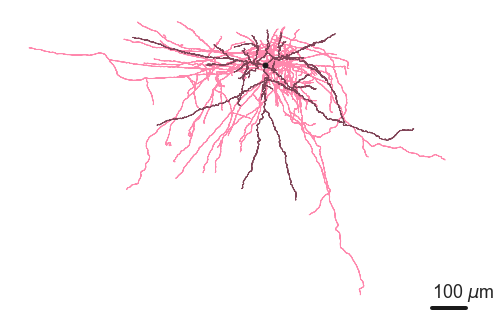

828758585 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Short square
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Capacitance
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Chirp test
  warnings.warn("Could not find stim

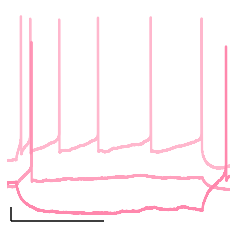

840142358
840142358 morph


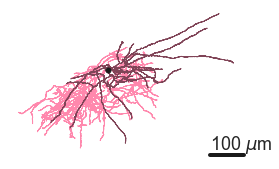

840142358 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


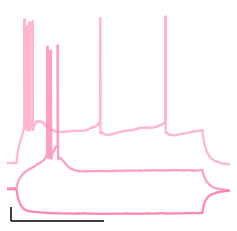

In [30]:
for cell in cells.index:
    print(cell)
    plot.plot_trace_morph(cell, cells, rotate=180, scale_factor=200)

### TNFAIP burst

In [31]:
group_vals = ['LAMP5', 'MC4R', 'PAX6', 'L1 VIP']
from itertools import combinations
pairs = list(combinations(group_vals, 2))

In [70]:
# bursting
human_df['adp_deltav'] = (human_df.adp_v_last_rheo - human_df.threshold_v_rheo)
# human_df['adp_deltav'] = (human_df.adp_v_last_rheo - human_df.fast_trough_v_last_rheo)
# human_df['adp_deltav'].loc[lambda x: x>50] = np.nan
human_df['mean_isi_inv_rheo'] = 1/human_df['mean_isi_rheo']
human_ephys = human_df.query('primary_ephys').copy()

In [98]:
features = [
    # 'adp_deltav',
   # 'first_isi_inv_rheo',
    'postap_slope_rheo',
   'first_isi_inv_rheo',
    # 'mean_isi_inv_rheo'
           ]
labels=[
    'ADP slope (V/s)',
    'Init. firing rate, rheobase (Hz)'
    # 'Mean firing rate, rheobase (Hz)'
]

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


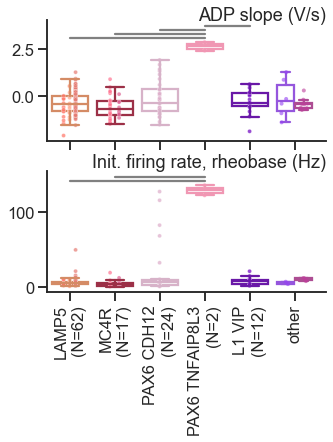

In [102]:
df = human_ephys.copy()
pax6 = df['homology_type']=='PAX6'
df['homology_type'] = df['homology_type'].astype(str)
df.loc[pax6, 'homology_type'] = df.loc[pax6, cluster]
df['homology_type'] = df['homology_type'].astype(
    CategoricalDtype(categories=['LAMP5','MC4R','PAX6 CDH12','PAX6 TNFAIP8L3','L1 VIP','other'], 
                     ordered=True))
pairs = [('PAX6 TNFAIP8L3', x) for x in ['LAMP5','MC4R', 'PAX6 CDH12' ,'L1 VIP']]
# pair = ('PAX6 TNFAIP8L3','PAX6 CDH12')
# pairs = [pair]+[(x, y) for y in pair for x in ['LAMP5','MC4R','L1 VIP'] ]
palette = palette_subclass
palette.update(palette_human)
utils.plot_boxplot_multiple(
    df, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette,
    plot_function=plot.plot_subclass_focus, subclasses=['other'], label_counts=True,
    space=0.25,
    pairs=pairs, test='dunn', drop_box='other', figsize=(5,5))
save_plot_multiple(figdir/"f5_boxplots_tnfaip_ephys", ['svg'])

In [64]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

In [103]:
df = human_ephys.copy()
df = df.assign(in_type=(df[cluster]=='PAX6 TNFAIP8L3'))
features = [x for x in ephys_features if df.loc[df.in_type, x].notna().mean() > 0.5] + ['adp_deltav']
res = utils.run_twosamp(df, features, 'in_type')
res.head(15)

,pval_mw,mw_r,roc_auc,pval_t,cohens_d,nobs,pval_t_fdr,pval_mw_fdr
feature,,,,,,,,
postap_slope_rheo,0.000092,1.000000,1.000000,1.405882e-08,3.901820,209,2.882059e-07,0.005128
median_isi_hero,0.000188,0.995122,0.997561,3.520011e-01,0.664642,207,7.108345e-01,0.005128
first_isi_inv_hero,0.000188,0.995122,0.997561,1.097393e-12,4.788716,207,4.499312e-11,0.005128
first_isi_inv_rheo,0.000470,0.992248,0.996124,1.246248e-16,5.243214,131,1.021923e-14,0.007704
mean_isi_rheo,0.000470,0.992248,0.996124,2.545471e-02,1.592091,131,1.304554e-01,0.007704
postap_slope_hero,0.000828,0.980676,0.990338,1.901971e-06,3.313538,209,3.119232e-05,0.011318
sag_peak_t,0.001458,0.971154,0.985577,2.499792e-11,4.524960,210,6.832766e-10,0.017082
trough_slowdeltav_rheo,0.001840,0.968599,0.984300,7.202645e-02,1.280869,209,2.362467e-01,0.018863
sag,0.002734,0.956731,0.978365,6.710808e-02,1.303427,210,2.362467e-01,0.024911


### Morpho features

In [92]:
df = human_df.copy()
df = df.assign(in_type=(df[cluster]=='PAX6 TNFAIP8L3'))
features = morph_features
res = utils.run_twosamp(df, features, 'in_type')
res.head(10)

,pval_mw,mw_r,roc_auc,pval_t,cohens_d,nobs,pval_t_fdr,pval_mw_fdr
feature,,,,,,,,
basal_dendrite_total_length,0.000666,1.000000,1.000000,7.223975e-08,3.572803,78,1.228076e-06,0.016983
basal_dendrite_extent_x,0.000666,1.000000,1.000000,1.544127e-09,3.915758,78,7.875050e-08,0.016983
basal_dendrite_total_surface_area,0.002664,0.973684,0.986842,4.025852e-08,3.629169,78,1.026592e-06,0.045288
axon_emd_with_basal_dendrite,0.003996,0.960526,0.980263,2.904139e-01,0.766921,78,5.696580e-01,0.050949
axon_over_basal_dendrite_extent_x,0.007992,0.934211,0.967105,2.131758e-01,0.901768,78,5.231935e-01,0.077637
basal_dendrite_max_euclidean_distance,0.010656,0.921053,0.960526,1.157357e-03,2.285330,78,1.180504e-02,0.077637
axon_frac_intersect_basal_dendrite,0.010656,0.927632,0.963816,8.842008e-02,1.228699,78,3.221017e-01,0.077637
basal_dendrite_num_branches,0.013320,0.907895,0.953947,6.159694e-03,1.945808,78,4.011279e-02,0.084915
basal_dendrite_max_path_distance,0.023976,0.868421,0.934211,2.156672e-03,2.165756,78,1.833171e-02,0.135864


In [93]:
features = ["basal_dendrite_extent_x", "basal_dendrite_num_branches"]
labels = ['dendrite horiz. extent (μm)', '# dendritic branches']
# features = ["basal_dendrite_extent_x", "basal_dendrite_total_surface_area"]
# labels = ['dendrite horiz. extent (μm)', '# dendritic branches']

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


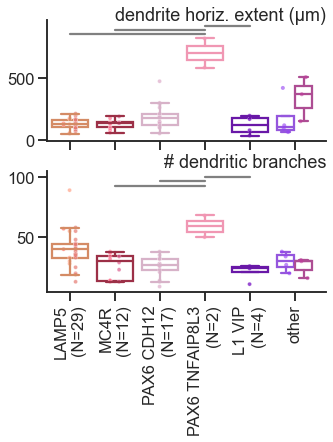

In [94]:
df = human_df.copy()
pax6 = df['homology_type']=='PAX6'
df['homology_type'] = df['homology_type'].astype(str)
df.loc[pax6, 'homology_type'] = df.loc[pax6, cluster]
df['homology_type'] = df['homology_type'].astype(
    CategoricalDtype(categories=['LAMP5','MC4R','PAX6 CDH12','PAX6 TNFAIP8L3','L1 VIP','other'], 
                     ordered=True))
pairs = [('PAX6 TNFAIP8L3', x) for x in ['LAMP5','MC4R', 'PAX6 CDH12' ,'L1 VIP']]
# pair = ('PAX6 TNFAIP8L3','PAX6 CDH12')
# pairs = [pair]+[(x, y) for y in pair for x in ['LAMP5','MC4R','L1 VIP'] ]
palette = palette_subclass
palette.update(palette_human)
utils.plot_boxplot_multiple(
    df, features, labels=labels, x='homology_type', palette_fine=palette_human, palette=palette,
    plot_function=plot.plot_subclass_focus, subclasses=['other'], label_counts=True,
    space=0.25,
    pairs=pairs, test='dunn', drop_box='other', figsize=(5,5))
save_plot_multiple(figdir/"f5_boxplots_tnfaip_morph", ['svg'])

## Mouse comparison

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x_fine'] = data[x_fine].map(x_key)
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x_fine'] = data[x_fine].map(x_key)


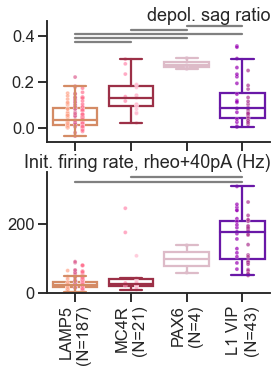

In [91]:
features = [
    "sag_depol", 
    "first_isi_inv_hero", 
    # 'adp_deltav' TODO: add once fixed!!
]
labels = [
    'depol. sag ratio',
   'Init. firing rate, rheo+40pA (Hz)'
]
utils.plot_boxplot_multiple(mouse_df.query('primary_ephys'), features, labels=labels, x='homology_type', figsize=(4,5),
                            # plot_function=plot.plot_subclass_focus, subclass='MC4R', 
                           x_fine=cluster, palette_fine=palette_mouse, space=0.25, pad_title=0,
                       palette=palette_subclass, label_counts=True)
save_plot_multiple(figdir/"f5_boxplots_mouse_pax6_ephys", ['svg'])

## Mouse examples

In [105]:
import patchseq_utils.lims as lims
reload(lims)
import patchseq_utils.plot.sweeps as ps
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [106]:
cells = mouse_df.loc[lambda df: df['topLeaf'].str.contains('Krt73')]
features = ["first_isi_inv_hero", "sag_depol", 'adp_deltav']
cells[features]

,first_isi_inv_hero,sag_depol,adp_deltav
spec_id,,,
855275163,58.004640,0.272952,NaN
935084855,137.362637,0.303722,0.724998
710346584,NaN,NaN,NaN
987138425,NaN,0.257356,NaN


In [37]:
reload(ps)

<module 'patchseq_utils.plot.sweeps' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plot/sweeps.py'>

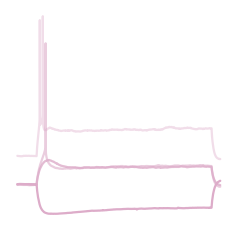

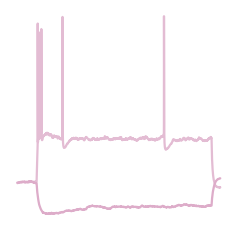

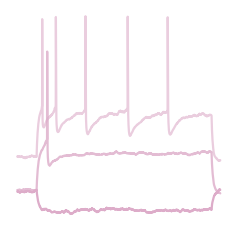

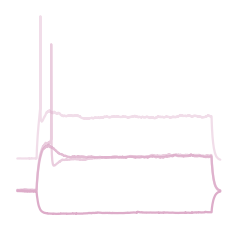

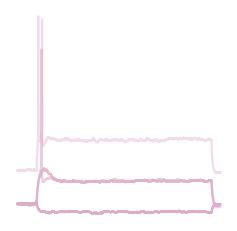

In [39]:
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_mouse[cells.loc[cell, cluster]])
    plt.show()

In [67]:
cells = mouse_df.loc[lambda df: df['topLeaf'].str.contains('Pax6')]
features = ["first_isi_inv_hero", "sag_depol", 'adp_deltav', 'has_morph']
cells[features]

,first_isi_inv_hero,sag_depol,adp_deltav,has_morph
spec_id,,,,
916642385,NaN,0.299697,-6.312500,False
993243528,245.098039,0.279104,2.537495,True
764341238,27.839644,0.234545,NaN,True
650476171,NaN,NaN,NaN,False
709461711,19.864919,0.136310,NaN,False
799870027,216.450216,0.147260,-2.143749,False
802366304,174.825175,0.117233,NaN,False


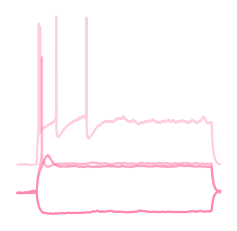

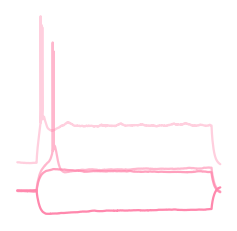

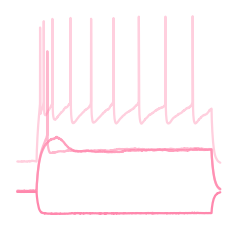

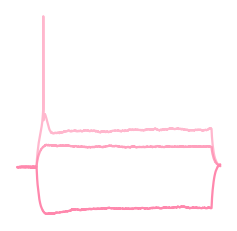

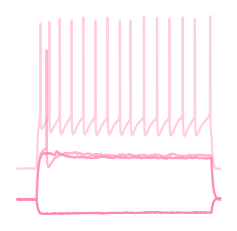

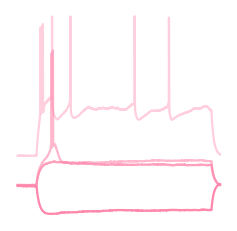

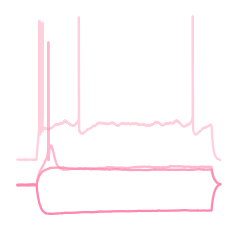

In [27]:
# some ADPs not getting calculated...
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_mouse[cells.loc[cell, cluster]])

In [92]:
reload(ps)
reload(plot)

<module 'patchseq_utils.plotting' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plotting.py'>

In [89]:
cells = mouse_df.loc[lambda df: df['topLeaf'].str.contains('Krt73') | df['topLeaf'].str.contains('Pax6')]
cells = cells.query("has_morph")

855275163 morph


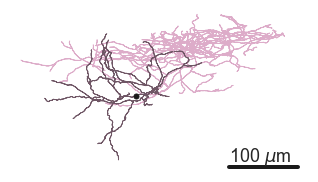

855275163 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


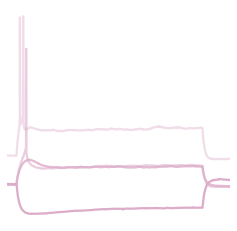

993243528 morph


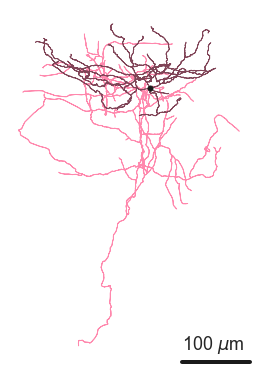

993243528 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


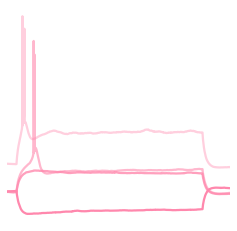

764341238 morph


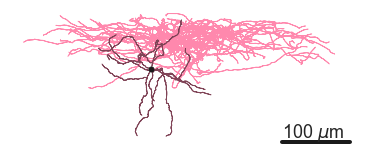

764341238 ephys


/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


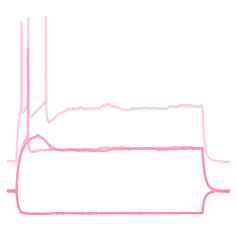

In [93]:
for cell in cells.index:
    plot.plot_trace_morph(cell, cells, palette=palette_mouse, plot_peri=True)

855275163 morph


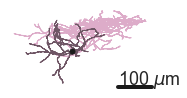

855275163 ephys


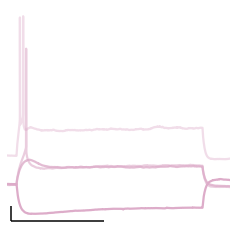

In [119]:
plot.plot_trace_morph(855275163, mouse_df, palette=palette_mouse, rotate=True, plot_peri=True, 
                      scale_factor=200, save=True)

## Human Examples

In [19]:
pd.options.display.max_columns=200
pd.options.display.max_rows=300
cells = human_df.loc[lambda df: df['adp_deltav']>-1].query('has_morph')
cells[cols]

,topLeaf,topLeafValue
spec_id,,
1036182166,Inh L1-3 VIP ADAMTSL1,0.50
840043506,Inh L1-2 PAX6 CDH12,0.90
1001478009,Inh L1-2 PAX6 TNFAIP8L3,1.00
840142358,Inh L1-2 PAX6 TNFAIP8L3,0.99


840142358 morph


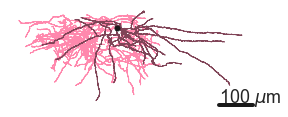

840142358 ephys


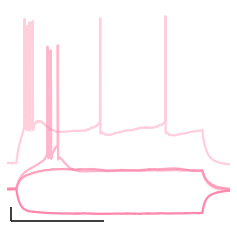

In [135]:
cell =840142358
plot.plot_trace_morph(cell, human_df, rotate=150, plot_hero=True, plot_peri=True,
                      scale_factor=200, save=True)

## CDH12 comparison

In [129]:
reload(ps)
reload(plot)

<module 'patchseq_utils.plotting' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plotting.py'>

721688585
721688585 morph


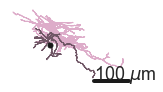

721688585 ephys


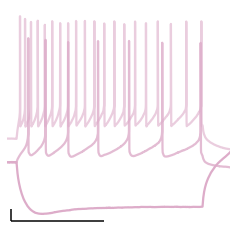

832614788
832614788 morph


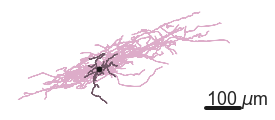

832614788 ephys


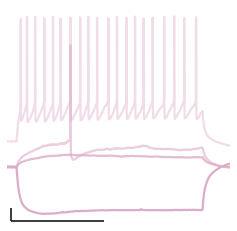

835572687
835572687 morph


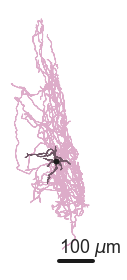

835572687 ephys


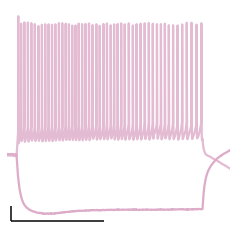

835648767
835648767 morph


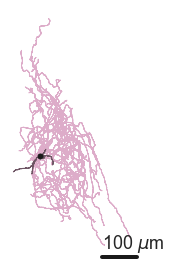

835648767 ephys


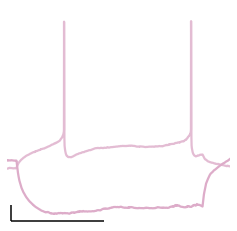

839950125
839950125 morph


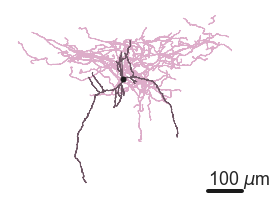

839950125 ephys


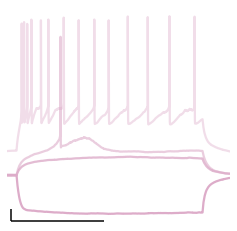

839970928
839970928 morph


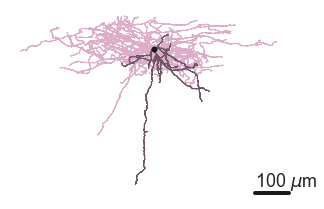

839970928 ephys


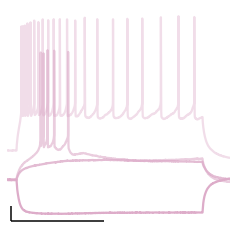

880352738
880352738 morph


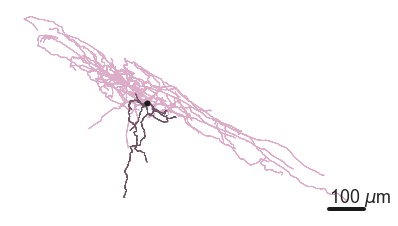

880352738 ephys


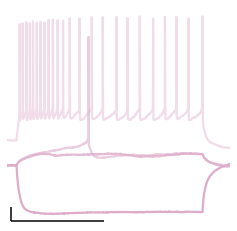

902511379
902511379 morph


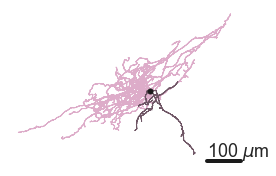

902511379 ephys


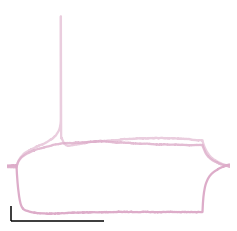

In [131]:
cells = human_df[human_df[cluster].str.contains("CDH12") & (human_df.topLeafValue==1)]
for cell in cells.query('has_morph').index:
    print(cell)
    plot.plot_trace_morph(cell, cells, rotate=180, scale_factor=200, plot_peri=True)

832614788 morph


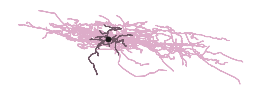

832614788 ephys


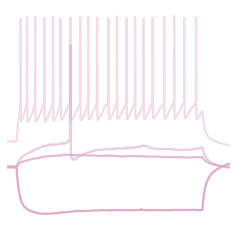

In [136]:
plot.plot_trace_morph(832614788, human_df, rotate=150, plot_peri=True, scale_factor=200, 
                      plot_hero=True,
                      scalebar=False, save=True)

835648767 morph


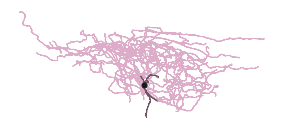

835648767 ephys


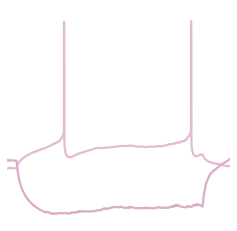

In [126]:
plot.plot_trace_morph(835648767, human_df, rotate=True, plot_peri=True, scale_factor=200, 
                      scalebar=False, save=True)